In [58]:
import pickle
from pathlib import Path
import datetime
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
matplotlib.rc('font', **{'size': 18})
import numpy as np
import json

In [28]:
date_to_shape = None
with open('../date_to_shape.json') as json_file:
    date_to_shape = json.load(json_file)
    dates, shapes = zip(*date_to_shape.items())
    dates, shapes = list(dates), list(shapes)

In [46]:
metadata_path = "../metadata/"
stations = {}
for date in dates:
#     print(date.split('.'))
    arr_to_load = date.split('.')
    arr_to_load.insert(1, '_stations.')
    print(arr_to_load)
    arr_to_load = "".join(arr_to_load)

    stations[date] = np.load(os.path.join(metadata_path, arr_to_load))

['2019-09-22', '_stations.', 'npy']
['2019-06-12', '_stations.', 'npy']
['2019-08-25', '_stations.', 'npy']
['2019-07-31', '_stations.', 'npy']
['2019-07-02', '_stations.', 'npy']
['2019-07-07', '_stations.', 'npy']
['2019-07-19', '_stations.', 'npy']
['2019-07-17', '_stations.', 'npy']
['2019-08-15', '_stations.', 'npy']
['2019-08-04', '_stations.', 'npy']
['2019-06-10', '_stations.', 'npy']
['2019-08-10', '_stations.', 'npy']
['2019-06-26', '_stations.', 'npy']
['2019-09-30', '_stations.', 'npy']
['2019-08-26', '_stations.', 'npy']
['2019-09-13', '_stations.', 'npy']
['2019-06-29', '_stations.', 'npy']
['2019-08-13', '_stations.', 'npy']
['2019-07-26', '_stations.', 'npy']
['2019-07-21', '_stations.', 'npy']
['2019-06-08', '_stations.', 'npy']
['2019-07-15', '_stations.', 'npy']
['2019-09-06', '_stations.', 'npy']
['2019-09-11', '_stations.', 'npy']
['2019-09-26', '_stations.', 'npy']
['2019-06-04', '_stations.', 'npy']
['2019-08-16', '_stations.', 'npy']
['2019-07-18', '_stations.',

In [50]:
counts = {}
for _, v in stations.items():
    for stat in v:
        if stat not in counts:
            counts[stat] = 0
print("Stations: ", counts)
print(len(counts))

Stations:  {'CI.CCC.': 0, 'CI.DTP.': 0, 'CI.LRL.': 0, 'CI.MPM.': 0, 'CI.SLA.': 0, 'CI.SRT.': 0, 'CI.TOW2.': 0, 'CI.WBM.': 0, 'CI.WCS2.': 0, 'CI.WMF.': 0, 'CI.WNM.': 0, 'CI.WRC2.': 0, 'CI.WRV2.': 0, 'CI.WVP2.': 0, 'GS.CA01.20': 0, 'GS.CA03.20': 0, 'GS.CA05.20': 0, 'GS.CA06.20': 0, 'GS.CA07.00': 0, 'GS.CA08.00': 0, 'GS.CA09.00': 0, 'GS.CA10.00': 0, 'NP.5419.10': 0, 'CI.CLC.': 0, 'CI.JRC2.': 0, 'GS.CA04.20': 0, 'ZY.SV01.': 0, 'ZY.SV02.': 0, 'ZY.SV03.': 0, 'ZY.SV04.': 0, 'ZY.SV06.': 0, 'ZY.SV08.': 0, 'GS.CA02.20': 0, 'ZY.SV05.': 0, 'ZY.SV07.': 0, 'NP.5419.': 0}
36


In [55]:
for s_idx, s in enumerate(shapes):
    num_events = s[1]
    assert s[0] == len(stations[dates[s_idx]])
    for stat in stations[dates[s_idx]]:
        counts[stat] += num_events
print(counts)

{'CI.CCC.': 35859, 'CI.DTP.': 35859, 'CI.LRL.': 35859, 'CI.MPM.': 35859, 'CI.SLA.': 35859, 'CI.SRT.': 35859, 'CI.TOW2.': 35859, 'CI.WBM.': 35859, 'CI.WCS2.': 35859, 'CI.WMF.': 35859, 'CI.WNM.': 35859, 'CI.WRC2.': 35859, 'CI.WRV2.': 35859, 'CI.WVP2.': 35859, 'GS.CA01.20': 30757, 'GS.CA03.20': 29422, 'GS.CA05.20': 27455, 'GS.CA06.20': 25768, 'GS.CA07.00': 24201, 'GS.CA08.00': 24201, 'GS.CA09.00': 19581, 'GS.CA10.00': 12112, 'NP.5419.10': 20032, 'CI.CLC.': 28201, 'CI.JRC2.': 35680, 'GS.CA04.20': 22088, 'ZY.SV01.': 24989, 'ZY.SV02.': 13443, 'ZY.SV03.': 21769, 'ZY.SV04.': 13733, 'ZY.SV06.': 20934, 'ZY.SV08.': 21451, 'GS.CA02.20': 18099, 'ZY.SV05.': 19679, 'ZY.SV07.': 18274, 'NP.5419.': 1896}


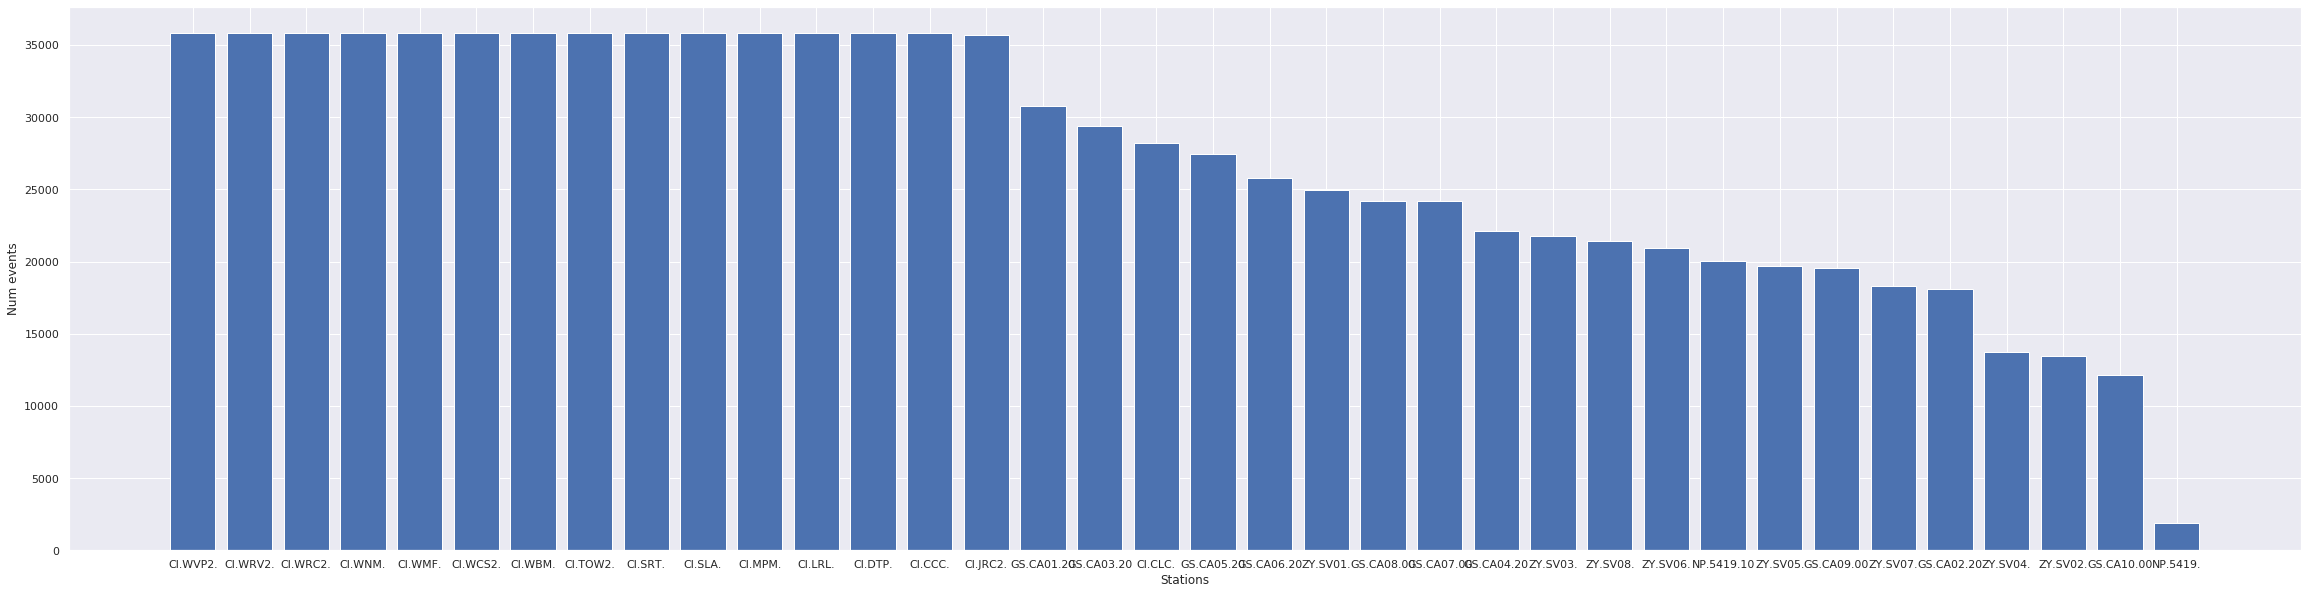

In [64]:
sorted_dict = sorted(zip(list(counts.values()), list(counts.keys())))
sorted_counts, sorted_stats = zip(*sorted_dict)
sorted_counts, sorted_stats = sorted_counts[::-1], sorted_stats[::-1]
plt.figure(figsize=(40,10))
plt.bar(sorted_stats, sorted_counts)
plt.xlabel('Stations'); plt.ylabel("Num events")
plt.show()